<a href="https://colab.research.google.com/github/tisianewembou/ai-skill-showcaseTisianeW/blob/feature%2FTisiane/tisiane_showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dolphin image loaded successfully YAY!


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
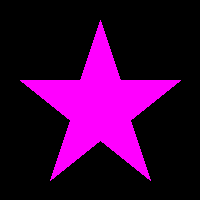

In [3]:
# AI Skill Showcase - Dolphin edition ( my favourite animal)
# Goal: Load a dolphin image, apply  rainbow edge transformation, display original and transformed images side-by-side.

# Importing needed libraries:

# OpenCV for image loading + processing + transformations
import cv2 as cv
# numpy for array manipulation + handling image data
import numpy as np
# matplotlib.pyplot for displaying images
import matplotlib.pyplot as plt



# Step 1: Load the dolphin image ( BGR format)
img = cv.imread("dolphin.png")

# Check if the image loaded correctly
if img is None:
    raise FileNotFoundError("File not found! Make sure it's in your repo folder.")
else:
    print("Dolphin image loaded successfully YAY!")



#Step 1.1: Load a shape (synthetic)
img2 = np.zeros((200, 200, 3), dtype='uint8')  # Blank image

# Define star points
star_points = np.array([[100, 20], [120, 80], [180, 80],
                        [130, 120], [150, 180], [100, 140],
                        [50, 180], [70, 120], [20, 80], [80, 80]], np.int32)

star_points = star_points.reshape((-1, 1, 2))

# Draw filled star
# Magenta (my favourite color)
cv.fillPoly(img2, [star_points], (255, 0, 255))
